### Importing the needed modules

In [1]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium 
import matplotlib.pyplot as plt
import random

In [2]:
city_list = ['Accra', 'Cairo', 'Harare', 'Lagos', 'Dakar', 'Kumasi', 'Cape Town', 'Nairobi', 'Pretoria', 'Freetown', 'Algiers', 'Tripoli']

### Creating a geopy function to help with the geocoding

In [3]:
def get_coordinates(city_list):
    """Takes a list of cities and returns a dictionary of the cities and their corresponding coordinates."""
    geolocator = Nominatim(user_agent="location script")
    dicto = {}
    
    for city in city_list:
        try:
            location = geolocator.geocode(city)
        except:
            raise Exception("There was a problem with the getCoordinates function")
        coordinate_values = (location.longitude, location.latitude)  #in geopandas, the x value corresponds to the longitude while the y value, the latitude(Just in case you were wondering why it was *location.longitude, location.latitude* and not the other way round )
        dicto[city] = coordinate_values #adding the coordinate pair to the dictionary at the end of every loop
    return dicto #finally retruns the dict 

In [4]:
city_list = ['Accra', 'Cairo', 'Harare', 'Lagos', 'Dakar', 'Kumasi', 'Cape Town', 'Nairobi', 'Pretoria', 'Freetown', 'Algiers', 'Tripoli']
city_coords_dict = get_coordinates(city_list)
city_coords_dict

{'Accra': (-0.2057437, 5.5600141),
 'Cairo': (31.2357257, 30.0443879),
 'Harare': (31.045686, -17.831773),
 'Lagos': (3.3941795, 6.4550575),
 'Dakar': (-17.447938, 14.693425),
 'Kumasi': (-1.6230404, 6.698081),
 'Cape Town': (18.417396, -33.928992),
 'Nairobi': (36.826061224105075, -1.3031689499999999),
 'Pretoria': (28.1879444, -25.7459374),
 'Freetown': (-13.26795, 8.479004),
 'Algiers': (2.9999825, 28.0000272),
 'Tripoli': (13.1777923, 32.896672)}

### Plotting with Geopandas

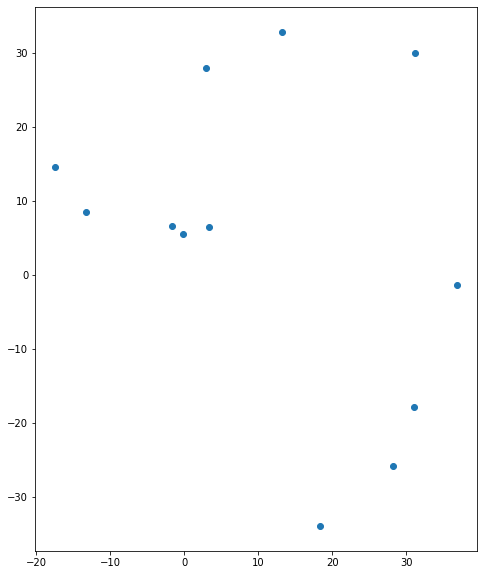

In [6]:
cities_geom = [Point(i) for i in city_coords_dict.values()]
d = {'Cities':[city for city in city_coords_dict.keys()], 'geometry': cities_geom} #we have to create a gdf so that we can add the crs information so we need geopandas now
cities_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
cities_gdf
cities_gdf.plot() 
plt.rcParams['figure.figsize'] = [10, 10]

<AxesSubplot:>

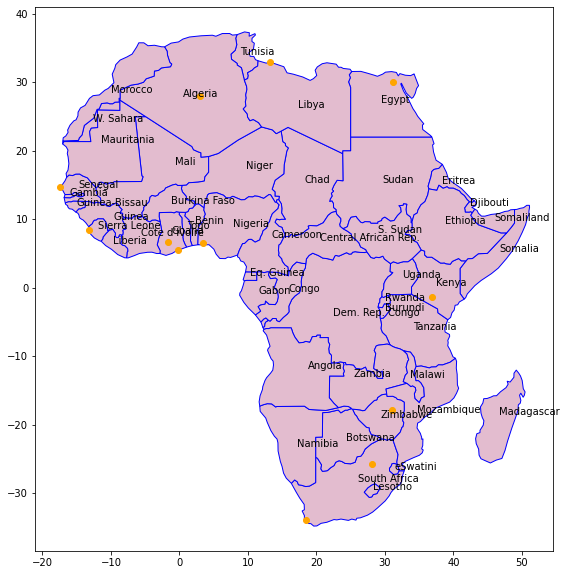

In [7]:
# load a sample geodataframe
africa_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  
africa_gdf = africa_gdf[africa_gdf['continent'] == 'Africa']

ax = africa_gdf.plot(color =  '#e3bccf', edgecolor = 'blue')
plt.rcParams['figure.figsize'] = [10, 10] #we're able to call this because geopandas is built on top of pandas, which is built on top of  matplotlib

for x, y, label in zip(africa_gdf.geometry.representative_point().x, africa_gdf.geometry.representative_point().y, africa_gdf.name):
    ax.annotate(label, xy=(x, y))
    
cities_gdf.plot(ax=ax, color = 'orange')

In [8]:
assert cities_gdf.crs == africa_gdf.crs

### Plotting with Folium

In [13]:
gjson_cities = cities_gdf['geometry'].to_json()

my_map = folium.Map(tiles='cartodb positron')
cities = folium.features.GeoJson(gjson_cities)
my_map.add_child(cities)
my_map   

### Doing more with Folium

In [19]:
cities_geom = [Point(i) for i in city_coords_dict.values()]
d = {'Cities':[city for city in city_coords_dict.keys()], 'geometry': cities_geom} #we have to create a gdf so that we can add the crs information 
cities_gdf = gpd.GeoDataFrame(d, crs = "EPSG:4326")
cities_gdf

,Cities,geometry
0,Accra,POINT (-0.20574 5.56001)
1,Cairo,POINT (31.23573 30.04439)
2,Harare,POINT (31.04569 -17.83177)
3,Lagos,POINT (3.39418 6.45506)
4,Dakar,POINT (-17.44794 14.69342)
5,Kumasi,POINT (-1.62304 6.69808)
6,Cape Town,POINT (18.41740 -33.92899)
7,Nairobi,POINT (36.82606 -1.30317)
8,Pretoria,POINT (28.18794 -25.74594)
9,Freetown,POINT (-13.26795 8.47900)


In [20]:
cities_gdf['Name'] = 'AYK Delivery, ' + cities_gdf['Cities']
cities_gdf['Coords'] = city_coords_dict.values()
cities_gdf['Number_of_Employees'] = random.randint(9, 30)
cities_gdf['Number_of_Employees'] = ['Employee count: {}'.format(random.randint(9, 30)) for entry in cities_gdf['Number_of_Employees']]
cities_gdf['Website'] = ["".join(i.split()).lower() + '.com' for i in cities_gdf['Name']]
cities_gdf

,Cities,geometry,Name,Coords,Number_of_Employees,Website
0,Accra,POINT (-0.20574 5.56001),"AYK Delivery, Accra","(-0.2057437, 5.5600141)",Employee count: 30,"aykdelivery,accra.com"
1,Cairo,POINT (31.23573 30.04439),"AYK Delivery, Cairo","(31.2357257, 30.0443879)",Employee count: 14,"aykdelivery,cairo.com"
2,Harare,POINT (31.04569 -17.83177),"AYK Delivery, Harare","(31.045686, -17.831773)",Employee count: 16,"aykdelivery,harare.com"
3,Lagos,POINT (3.39418 6.45506),"AYK Delivery, Lagos","(3.3941795, 6.4550575)",Employee count: 13,"aykdelivery,lagos.com"
4,Dakar,POINT (-17.44794 14.69342),"AYK Delivery, Dakar","(-17.447938, 14.693425)",Employee count: 13,"aykdelivery,dakar.com"
5,Kumasi,POINT (-1.62304 6.69808),"AYK Delivery, Kumasi","(-1.6230404, 6.698081)",Employee count: 22,"aykdelivery,kumasi.com"
6,Cape Town,POINT (18.41740 -33.92899),"AYK Delivery, Cape Town","(18.417396, -33.928992)",Employee count: 10,"aykdelivery,capetown.com"
7,Nairobi,POINT (36.82606 -1.30317),"AYK Delivery, Nairobi","(36.826061224105075, -1.3031689499999999)",Employee count: 17,"aykdelivery,nairobi.com"
8,Pretoria,POINT (28.18794 -25.74594),"AYK Delivery, Pretoria","(28.1879444, -25.7459374)",Employee count: 17,"aykdelivery,pretoria.com"
9,Freetown,POINT (-13.26795 8.47900),"AYK Delivery, Freetown","(-13.26795, 8.479004)",Employee count: 21,"aykdelivery,freetown.com"


In [21]:
the_map = folium.Map(location=[5.6, 26.17], tiles="cartodbpositron", zoom_start=3.4)

def add_markers_to_the_map(the_map, gdf, color, icon):  
    points = list(zip(gdf.Coords, gdf.Name, gdf.Number_of_Employees, gdf.Website))
    for point in points:         
            popup_text = "{}, {}, {}".format(point[1], str(point[2]), point[3])
        
            popup = folium.Popup(popup_text, autopan='False', parse_html=True)
                
            marker = folium.Marker(location=[point[0][1], point[0][0]], 
                                   popup=popup, 
                                   icon = folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa')).add_to(the_map)
    return the_map

In [22]:
add_markers_to_the_map(the_map, cities_gdf, color = 'orange', icon='motorcycle')

In [23]:
the_map.save('C:/Users/ALBERTA ANIM-AYEKO/Desktop/Python/Medium/TDS/WRITTEN/MAKING COOL MAPS WITH FOLIUM AND GEOPY/templates/the_map.html')